In [ ]:
!pip install umap

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X, y = digits.data, digits.target

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for lbl in np.unique(y):
    axs[lbl // 5, lbl % 5].imshow(X[y == lbl][0].reshape(8,8), cmap = 'gray')

### UMAP (Uniform Manifold Approximation and Projection) 

UMAP is a dimensionality reduction algorithm that preserves both local and global structure of the data. 

**Assumptions**
1. There exists an underlying manifold on which the data would be uniformly distributed
2. This underlying manifold is locally connected
3. The primary goal is to preserve the topological structure of the underlying manifold

**Inputs**
Dataset $\{ \mathbf{x}_1,\dots ,\mathbf{x}_p\}$, number of nearest neighbors $n$, metric $d$, reduced dimension $k$, minimum distance

*The choice of k determines how locally we wish to estimate the Riemannian metric. A small choice of k means we want a very local interpretation which will more accurately capture fine detail structure and variation of the Riemannian metric. Choosing a large k means our estimates will be based on larger regions, and thus, while missing some of the fine detail structure, they will be more broadly accurate across the manifold as a whole, having more data to make the estimate with.*

**Algorithm**

1. **Graph-Building** (Fuzzy topological representation)

   a. $\rho_i$ as the minimium distance between $\mathbf{x}_i$ and all other points

   b. $\sigma_i$ as the solution (via binary search) to
   $$
   \sum_{j=1}^n \mathrm{exp}\left( \frac{-\max(0,d(\mathbf{x}_i,\mathbf{x}_{i_j})-\rho_i)}{\sigma_i} \right) = \log_2(n)
   $$
   c. Define a graph on data with edge weights from point $i$ to $i_j$ as
   $$
   \mathrm{exp}\left( \frac{-\max(0,d(\mathbf{x}_i,\mathbf{x}_{i_j})-\rho_i)}{\sigma_i} \right)
   $$
   This is a normalization factor defining a Riemannian metric at point $\mathbf{x}_i$.

   d. Let $\mathbf{A}$ be adjacency matrix for this graph. Then define $\mathbf{B} = \mathbf{A} + \mathbf{A}^\top - \mathbf{A} \circ \mathbf{A}^\top$ as the adjacency matrix for the UMAP graph.

*The way to think of this is that the weights are effectively the probabilities that an edge (1 simplex) exists. The combined weight is then the probability that at least one of the edges exists.*

2. **Optimizing** the low dimensional representation to have as close a fuzzy topological representation as possible as measured by cross entropy:

Initialize with spectral embedding. Then optimize with stochastic gradient descent to minimize cross entropy loss
$$ C = \sum_{e} w_h(e)\log\left(\frac{w_h(e)}{w_l(e)}\right) + \left(1-w_h(e)\right)\log\left(\frac{1-w_h(e)}{1-w_l(e)}\right) $$
First term is attractive force and second term is repulsive force.

*Note: all distances smaller than minimum distance parameter in low-dimensional space are set to 0 during optimization*

#### Key advantages of UMAP:
- Better preservation of global structure compared to t-SNE through explicit optimization of both local and global structure
- Faster computation time, especially for large datasets (O(nlog(n)) vs O(n²))
- Theoretical foundation in manifold learning and topological data analysis via category theory and fuzzy simplicial sets
- Can be used for general dimension reduction, not just visualization
- Approximately invertable https://umap-learn.readthedocs.io/en/latest/inverse_transform.html
- AlignUMAP (towards aligning embeddings for 2 related datasets) https://umap-learn.readthedocs.io/en/latest/aligned_umap_basic_usage.html

#### Parameter tuning with UMAP

**Parameters**
* Number of neighbors *balances local versus global structure in the data*
* Minimum distance: *how tightly UMAP is allowed to pack points together;* *desired separation between close points in the embedding space*
* Resource for parameter intuition https://pair-code.github.io/understanding-umap/

#### References
* https://umap-learn.readthedocs.io/en/latest/how_umap_works.html
* https://arxiv.org/pdf/1802.03426

<!-- **Algorithm**
1. Generate a graph
 





It works by:
1. Constructing a *fuzzy* topological representation using a local:
   $$ d(x_i, x_j) = -\log_2(\frac{\text{exp}(-\|x_i - x_j\|_2^2/\sigma_i)}{\sum_{k \neq i}\text{exp}(-\|x_i - x_k\|_2^2/\sigma_i)}) $$
2. Finding a low-dimensional projection that minimizes the cross-entropy between high and low-dimensional fuzzy simplicial sets with cross entropy
   $$ C = \sum_{e} w_h(e)\log(\frac{w_h(e)}{w_l(e)}) + (1-w_h(e))\log(\frac{1-w_h(e)}{1-w_l(e)}) $$
   First term is attractive force and second term is repulsive force.
3. Optimizing this projection using stochastic gradient descent




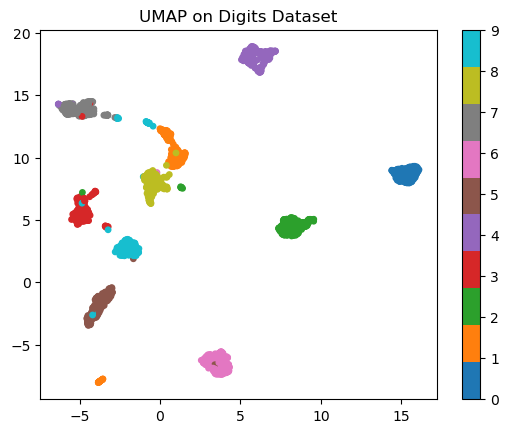

In [59]:
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
umap_embedding = reducer.fit_transform(X)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=y, cmap='tab10', s=15)
plt.title("UMAP on Digits Dataset")
plt.colorbar()



#### UMAP vs t-SNE

https://aicompetence.org/comparing-t-sne-and-umap/